## 載入影片並提取幀

In [1]:
import cv2
import os
from tqdm import tqdm

def extract_frames(video_path, interval_seconds=1):
    frames=[]
    cap = cv2.VideoCapture(video_path)
    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_interval = int(fps * interval_seconds)
    frame_count = 0
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    print(f"Extracting frames from video: {video_path}")
    for i in tqdm(range(total_frames), desc="Reading video frames"):
        ret, frame = cap.read()
        if not ret:
            break
        if frame_count % frame_interval == 0:
            frames.append(frame)
      
        frame_count += 1
    
    cap.release()
    print(f"Frames saved")
    return frames

# 測試影片提取
video_path = "C:/Users/fishd/Desktop/Github/AutoAerial-ID/images/752750716.004314.mp4"

frames=extract_frames(video_path, interval_seconds=1)
print(len(frames))


Extracting frames from video: C:/Users/fishd/Desktop/Github/AutoAerial-ID/images/752750716.004314.mp4


Reading video frames: 100%|██████████| 946/946 [00:02<00:00, 391.52it/s]

Frames saved
33


(1280, 720, 3)

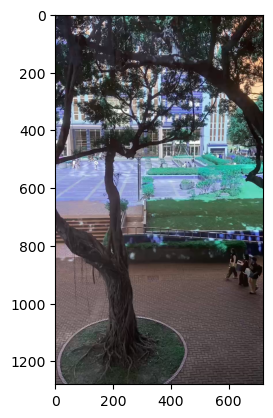

In [2]:
import matplotlib.pyplot as plt

plt.imshow(frames[0])
frames[0].shape

## 估算背景

Estimating background from frames...


Analyzing frames:   0%|          | 0/33 [00:00<?, ?it/s]

Analyzing frames: 100%|██████████| 33/33 [00:00<00:00, 38.43it/s]


(1280, 720, 3)


True

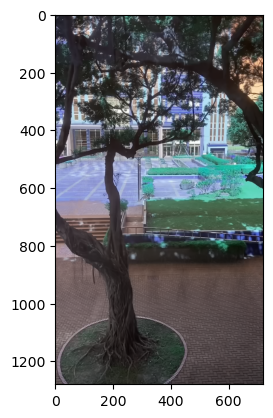

In [4]:
import numpy as np
import cv2
from tqdm import tqdm

def estimate_background(frames, conf_threshold=0.35): #Background Subtraction
    print("Estimating background from frames...")
    
    acc_frame = np.zeros_like(frames[0], dtype=np.float64) #累加像素值，用於計算背景的總和。
    acc_weight = np.zeros_like(frames[0], dtype=np.float64)#累加權重，記錄每個像素參與累加的次數。

    for frame in tqdm(frames, desc="Analyzing frames"):
        clean_mask = np.ones_like(frame, dtype=np.float64)  # 假設整幀是背景
        acc_frame += frame.astype(np.float64) * clean_mask
        acc_weight += clean_mask

    acc_weight[acc_weight == 0] = 1
    background = (acc_frame / acc_weight).astype(np.uint8)
    plt.imshow(background)
    
  
    print(background.shape)
    plt.imshow(background)    
    return background
    



# 估算背景
background = estimate_background(frames)
cv2.imwrite('./estimated_background.jpg', background)
